In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

L_data = pd.read_csv("Data/L_data_merged.csv", low_memory = False)

L_data['date'] = pd.to_datetime(L_data['date'], infer_datetime_format=True)

In [43]:
#create data frame for 2018 data
L_data_2018 = L_data.loc[(L_data['date']>= '01-01-2018') & (L_data['date']<= "12-29-2018")]
L_data_2018.sort_values(by=['date'], inplace = True)

L_data_2018 = L_data_2018.reset_index(drop = True)
L_data_2018.head()

C:\Users\cdfen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City
0,2018-01-01,U,3258,95th/Dan Ryan (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.722377, -87.624342)",Roseland,Chicago
1,2018-01-01,U,1082,Chicago (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.896075, -87.655214)",West Town,Chicago
2,2018-01-01,U,574,Central (Green Line),True,False,False,True,False,False,False,False,False,False,"(41.887389, -87.76565)",Austin,Chicago
3,2018-01-01,U,1263,Sox-35th (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.831191, -87.630636)",Armour Square,Chicago
4,2018-01-01,U,1549,87th (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.735372, -87.624717)",South Side,Chicago


In [26]:
L_data_2018['Week Number'] = L_data_2018['date'].dt.week
L_data_2018

,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City,Week Number
0,2018-01-01,U,3258,95th/Dan Ryan (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.722377, -87.624342)",Roseland,Chicago,1
1,2018-01-01,U,1082,Chicago (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.896075, -87.655214)",West Town,Chicago,1
2,2018-01-01,U,574,Central (Green Line),True,False,False,True,False,False,False,False,False,False,"(41.887389, -87.76565)",Austin,Chicago,1
3,2018-01-01,U,1263,Sox-35th (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.831191, -87.630636)",Armour Square,Chicago,1
4,2018-01-01,U,1549,87th (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.735372, -87.624717)",South Side,Chicago,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52268,2018-12-29,A,1314,Morgan (Green & Pink Lines),True,False,False,True,False,False,False,False,True,False,"(41.885586, -87.652193)",West Loop,Chicago,52
52269,2018-12-29,A,3979,"Fullerton (Red, Brown & Purple Lines)",True,False,False,False,True,False,True,False,False,False,"(41.925051, -87.652866)",Sheffield & DePaul,Chicago,52
52270,2018-12-29,A,1169,Grand (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.891189, -87.647578)",West Town,Chicago,52
52271,2018-12-29,A,1323,Pulaski (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.873797, -87.725663)",Garfield Park,Chicago,52


In [35]:
weekly_2018 = L_data_2018.groupby('Week Number').sum()
weekly_2018 = weekly_2018.reset_index()
weekly_2018.head()

,Week Number,rides,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O
0,1,2433501,196.0,231.0,204.0,190.0,63.0,134.0,21.0,106.0,57.0
1,2,3230587,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
2,3,3247214,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
3,4,3512664,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
4,5,3367002,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0


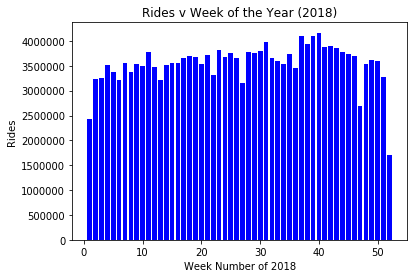

In [40]:
# Create a line Plot 2018 weekly rides
x_values = weekly_2018['Week Number']
y_values = weekly_2018['rides']
plt.bar(x_values,y_values, color='b')
plt.xlabel('Week Number of 2018')
plt.ylabel('Rides')
plt.title('Rides v Week of the Year (2018)')
plt.show()

In [56]:
#create data frame for 2018 data, january to end of may to compare with partital 2020 year
L_data_2018_JtoM = L_data.loc[(L_data['date']>= '01-01-2018') & (L_data['date']<= "05-31-2018")]
L_data_2018_JtoM.sort_values(by=['date'], inplace = True)

L_data_2018_JtoM = L_data_2018_JtoM.reset_index(drop = True)
L_data_2018_JtoM['Week Number'] = L_data_2018_JtoM['date'].dt.week

weekly_2018_JtoM = L_data_2018_JtoM.groupby('Week Number').sum()
weekly_2018_JtoM = weekly_2018_JtoM.reset_index()
weekly_2018_JtoM.head()

C:\Users\cdfen\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Week Number,rides,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O
0,1,2433501,196.0,231.0,204.0,190.0,63.0,134.0,21.0,106.0,57.0
1,2,3230587,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
2,3,3247214,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
3,4,3512664,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
4,5,3367002,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0


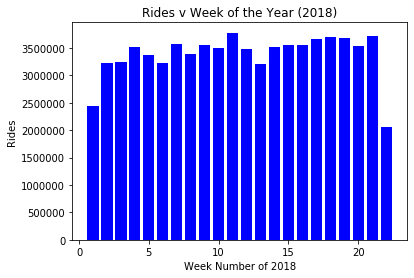

In [57]:
# Create a second line Plot 2019 weekly rides, january to end of may to compare with partital 2020 year
x_values = weekly_2018_JtoM['Week Number']
y_values = weekly_2018_JtoM['rides']
plt.bar(x_values,y_values, color='b')
plt.xlabel('Week Number of 2018')
plt.ylabel('Rides')
plt.title('Rides v Week of the Year (2018)')
plt.show()

In [47]:
#create data frame for 2019 data
L_data_2019 = L_data.loc[(L_data['date']>= '01-01-2019') & (L_data['date']<= "12-28-2019")]
L_data_2019.sort_values(by=['date'], inplace = True)

L_data_2019 = L_data_2019.reset_index(drop = True)
L_data_2019['Week Number'] = L_data_2019['date'].dt.week

C:\Users\cdfen\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
weekly_2019 = L_data_2019.groupby('Week Number').sum()
weekly_2019 = weekly_2019.reset_index()
weekly_2019.head()

,Week Number,rides,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O
0,1,2190284,168.0,198.0,174.0,162.0,54.0,114.0,18.0,90.0,48.0
1,2,3265080,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
2,3,3382899,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
3,4,2985030,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
4,5,2327993,196.0,231.0,200.0,186.0,63.0,130.0,21.0,102.0,53.0


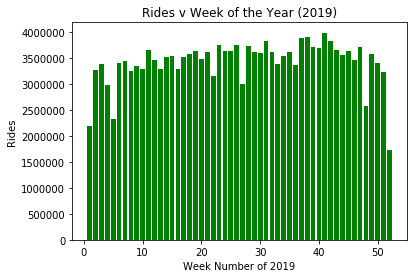

In [50]:
# Create a line Plot 2019 weekly rides
x_values = weekly_2019['Week Number']
y_values = weekly_2019['rides']
plt.bar(x_values,y_values, color='g')
plt.xlabel('Week Number of 2019')
plt.ylabel('Rides')
plt.title('Rides v Week of the Year (2019)')
plt.show()

In [54]:
#create data frame for 2019 data
L_data_2019_JtoM = L_data.loc[(L_data['date']>= '01-01-2019') & (L_data['date']<= "05-31-2019")]
L_data_2019_JtoM.sort_values(by=['date'], inplace = True)

L_data_2019_JtoM = L_data_2019_JtoM.reset_index(drop = True)
L_data_2019_JtoM['Week Number'] = L_data_2019_JtoM['date'].dt.week

weekly_2019_JtoM = L_data_2019_JtoM.groupby('Week Number').sum()
weekly_2019_JtoM = weekly_2019_JtoM.reset_index()
weekly_2019_JtoM.head()

C:\Users\cdfen\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Week Number,rides,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O
0,1,2190284,168.0,198.0,174.0,162.0,54.0,114.0,18.0,90.0,48.0
1,2,3265080,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
2,3,3382899,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
3,4,2985030,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
4,5,2327993,196.0,231.0,200.0,186.0,63.0,130.0,21.0,102.0,53.0


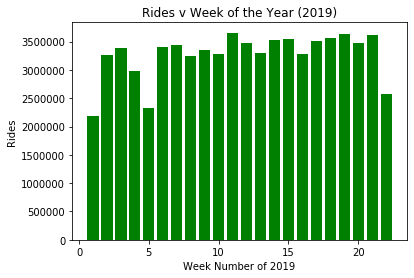

In [55]:
# Create a second line Plot 2019 weekly rides, january to end of may to compare with partital 2020 year
x_values = weekly_2019_JtoM['Week Number']
y_values = weekly_2019_JtoM['rides']
plt.bar(x_values,y_values, color='g')
plt.xlabel('Week Number of 2019')
plt.ylabel('Rides')
plt.title('Rides v Week of the Year (2019)')
plt.show()

In [51]:
#create data frame for 2020 data
L_data_2020 = L_data.loc[(L_data['date']>= '01-01-2020') & (L_data['date']<= "12-26-2020")]
L_data_2020.sort_values(by=['date'], inplace = True)

L_data_2020 = L_data_2020.reset_index(drop = True)
L_data_2020['Week Number'] = L_data_2020['date'].dt.week

C:\Users\cdfen\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
weekly_2020 = L_data_2020.groupby('Week Number').sum()
weekly_2020 = weekly_2020.reset_index()
weekly_2020.head()

,Week Number,rides,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O
0,1,1583767,140.0,165.0,140.0,130.0,45.0,90.0,15.0,70.0,35.0
1,2,3153480,196.0,231.0,196.0,182.0,63.0,126.0,21.0,98.0,49.0
2,3,3339678,196.0,231.0,196.0,182.0,63.0,126.0,21.0,98.0,49.0
3,4,3103740,196.0,231.0,196.0,182.0,63.0,126.0,21.0,98.0,49.0
4,5,3346621,196.0,231.0,196.0,182.0,63.0,126.0,21.0,98.0,49.0


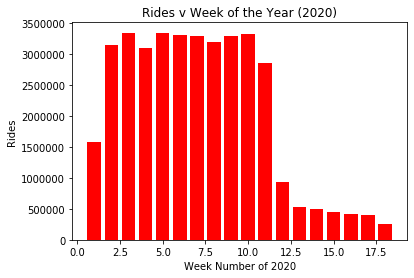

In [53]:
# Create a line Plot 2020 weekly rides
x_values = weekly_2020['Week Number']
y_values = weekly_2020['rides']
plt.bar(x_values,y_values, color='r')
plt.xlabel('Week Number of 2020')
plt.ylabel('Rides')
plt.title('Rides v Week of the Year (2020)')
plt.show()

Text(0, 0.5, 'Rides')

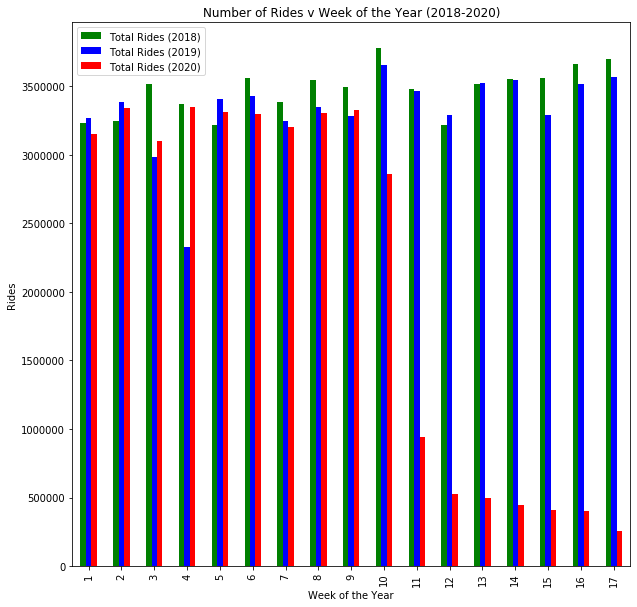

In [86]:
#Plot total weekly number of rides by daytype for past 3 years for january to end of may
plotdata = pd.DataFrame({
    "Total Rides (2018)": weekly_2018_JtoM['rides'],
    "Total Rides (2019)": weekly_2019_JtoM['rides'],
    "Total Rides (2020)": weekly_2020['rides']
    },
    index=weekly_2020['Week Number']
).dropna()

color = ["green", "blue", "red"]

plotdata.plot(kind="bar", color=color, figsize=(10,10))
plt.title("Number of Rides v Week of the Year (2018-2020)")
plt.xlabel("Week of the Year")
plt.ylabel("Rides")